# HomeWork 1- 17350796

It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, 
as declared to the Revenue Commissioners for stamp duty purposes
csv file = ppr-17350796.csv

## Part 1: Preparing the data from CSV



In [1]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

Reading in the data and displaying the first 5 rows:


In [2]:
df = pd.read_csv('ppr-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)


## First 5 rows

In [3]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,06/05/2016,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,"€630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,22/12/2014,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,"€281,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,22/05/2020,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,"€560,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/11/2014,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,"€46,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/11/2018,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,"€204,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


## Last 5 rows

Displaying the last 5 rows

In [4]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,15/12/2017,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,18/12/2012,"17 the court, cypress downs, templeogue",NaN,Dublin,"€605,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,14/12/2016,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,"€46,666.67",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,19/06/2017,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,"€176,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/11/2017,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,"€86,738.06",Yes,No,Second-Hand Dwelling house /Apartment,NaN


### Shape

Display number of rows and columns- 10000 = Rows, 9 = columns

In [5]:
# number of rows and columns
df.shape

(10000, 9)

The data is currently all read as object. The data needs to be change to the appropriate data type for it to be accurately analysed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1860 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1029 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Looking at the column names for errrors 

In [7]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [8]:
# Converting price to float, you need to remove all symbols from strings for the command to work. 



df['Price (€)'] = df['Price (€)'].str.replace(',', '')


df['Price (€)'] = df['Price (€)'].str.replace('€', '')

df['Price (€)'] = df['Price (€)'].astype(float)

df[['Price (€)']]

,Price (€)
0,630000.00
1,281000.00
2,560000.00
3,46000.00
4,204000.00
...,...
9995,200000.00
9996,605000.00
9997,46666.67
9998,176000.00


These object features have been changed to categorical as they each describe unique values

In [9]:

# There are a set number of unique counties
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')






df.dtypes

Date of Sale (dd/mm/yyyy)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
dtype: object

In [10]:
# converting dates to date data type
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'])

df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

In [11]:
df['Year'] = pd.DatetimeIndex(df['Date of Sale (dd/mm/yyyy)']).year
df['Month'] = pd.DatetimeIndex(df['Date of Sale (dd/mm/yyyy)']).month

df.head(10)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,6
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,12
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2020,5
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,11
4,2018-11-22,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,11
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,1
6,2021-11-30,"10 HOLLOW WAY, OAKVIEW VILLAGE, TRALEE",NaN,Kerry,182000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2021,11
7,2016-02-05,"Ballygibbon, Nenagh",NaN,Tipperary,264317.0,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2016,2
8,2018-12-03,"RANDLESTOWN, BALLYCOGLEY, WEXFORD",NaN,Wexford,70000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,12
9,2015-11-17,"3 RIVER STREET, CLARA, CO OFFALY",NaN,Offaly,34500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,11


In [12]:
df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
Year                                  int64
Month                                 int64
dtype: object

Looking for duplicate rows and columns

In [13]:
# There is 20 non unique addresses 
df.nunique()

Date of Sale (dd/mm/yyyy)    2759
Address                      9980
Postal Code                    22
County                         26
Price (€)                    2285
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         3
Property Size Description       4
Year                           13
Month                          12
dtype: int64

In [14]:
df.isnull().sum()

Date of Sale (dd/mm/yyyy)       0
Address                         0
Postal Code                  8140
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8971
Year                            0
Month                           0
dtype: int64

The columm 'Property Size Description' has been dropped due to over 50% of the data is missing and cannot be inferred with accuracy

In [15]:
df.drop('Property Size Description', axis=1, inplace=True)
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Year,Month
9995,2017-12-15,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,2017,12
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,2012,12
9997,2016-12-14,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,2016,12
9998,2017-06-19,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,2017,6
9999,2017-02-11,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,2017,2


In [16]:
df['Not Full Market Price'].value_counts(dropna=False)

No     9552
Yes     448
Name: Not Full Market Price, dtype: int64

## Postal Codes Review

The county Dublin appears 3193 times, this is the highest proportion. 

In [17]:
df.loc[df['County'].isin(['Dublin'])]

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Year,Month
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.00,No,No,Second-Hand Dwelling house /Apartment,2016,6
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.00,No,No,Second-Hand Dwelling house /Apartment,2014,12
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.00,No,No,Second-Hand Dwelling house /Apartment,2020,5
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.00,No,No,Second-Hand Dwelling house /Apartment,2016,1
10,2015-06-15,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,2015,6
...,...,...,...,...,...,...,...,...,...,...
9975,2013-04-11,"29 Carndonagh Drive, Donaghmede, Dublin 13",Dublin 13,Dublin,190000.00,No,No,Second-Hand Dwelling house /Apartment,2013,4
9988,2020-10-03,"44 GERALDSTOWN WOODS, SANTRY AVE, DUBLIN 9",Dublin 9,Dublin,170000.00,No,No,Second-Hand Dwelling house /Apartment,2020,10
9993,2019-05-12,"6 Edenbrook Green, Edenbrook, Citywest",NaN,Dublin,348017.61,No,Yes,New Dwelling house /Apartment,2019,5
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,2012,12


In [18]:
df["Postal Code"].describe().T

count          1860
unique           22
top       Dublin 15
freq            232
Name: Postal Code, dtype: object

58% percent have a set post code, while this is low. I have opted to keep the data as it still could provide relevent statisical inferences

There is some logical integrity issues with the data. Some post codes do not match the post codes in their addresses.

In [19]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,Address,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property
0,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment
1,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment
2,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,No,No,Second-Hand Dwelling house /Apartment
3,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,No,No,Second-Hand Dwelling house /Apartment
4,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,No,No,Second-Hand Dwelling house /Apartment


In [20]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

## Description of Property Iregularity 

'Description of Property' shows 3 unique properties. "Teach/Árasán Cónaithe Atháimhe" is the Irish translation of "Second-Hand Dwelling house /Apartment". While it is important that Irish people practice their native language for the purpose of data analytics it makes sense to change this to the english category for consistency. 

In [21]:
# getting index of where the illogical data is 
df.index[df['Description of Property'] == 'Teach/Árasán Cónaithe Atháimhe'].tolist()

[5686]

In [22]:
# replacing with english translation
df.at[5686,'Description of Property']='Second-Hand Dwelling house /Apartment'


In [23]:
df['Description of Property'].value_counts(dropna=False)

Second-Hand Dwelling house /Apartment    8364
New Dwelling house /Apartment            1636
Teach/Árasán Cónaithe Atháimhe              0
Name: Description of Property, dtype: int64

In [24]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364


# Describing Numeric Types

In [25]:
numeric_columns = df.select_dtypes(['float64','int']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

In [26]:
df.describe(datetime_is_numeric=True).T



,count,mean,min,25%,50%,75%,max,std
Date of Sale (dd/mm/yyyy),10000,2017-01-19 02:06:08.640000,2010-01-02 00:00:00,2014-11-07 00:00:00,2017-06-02 12:00:00,2019-08-04 00:00:00,2022-12-01 00:00:00,NaN
Price (€),10000.0,260260.702676,5500.0,120000.0,200000.0,308370.08,17151248.0,390170.322939
Year,10000.0,2016.5192,2010.0,2014.0,2017.0,2019.0,2022.0,3.108729
Month,10000.0,6.8947,1.0,4.0,7.0,10.0,12.0,3.477186


In [27]:
# numeric_DataDescription_Table = df.describe(datetime_is_numeric=True).T

# # plot = plt.subplot(111, frame_on=False)

# # #     #remove axis
# # # plot.xaxis.set_visible(False) 
# # # plot.yaxis.set_visible(False) 

# # #create the table plot and position it in the upper left corner
# # table(plot, numeric_DataDescription_Table,loc='upper right')

# #save the plot as a png file
# plt.savefig('numericDataDescribed.png')

#### Summary stats for numeric data Price (€)
From look at the price data, the standard deviation is very large, with a large range of values. Range = 17145748

In [28]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


### Median value of price

In [29]:
df['Price (€)'].median()


200000.0

In [30]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Price (€),2285


In [31]:
df['Address'].describe()

count                                                 10000
unique                                                 9980
top       APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...
freq                                                      2
Name: Address, dtype: object

In [32]:
df.to_csv('updated-ppr-17350796.csv', index=False)

In [33]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

In [34]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
NaN          0.8140
Dublin 15    0.0232
Dublin 18    0.0143
Dublin 9     0.0119
Dublin 8     0.0115
Dublin 24    0.0114
Dublin 4     0.0109
Dublin 12    0.0104
Dublin 16    0.0096
Dublin 11    0.0093
Dublin 7     0.0088
Dublin 13 

In [35]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
Dublin 15    0.124731
Dublin 18    0.076882
Dublin 9     0.063978
Dublin 8     0.061828
Dublin 24    0.061290
Dublin 4     0.058602
Dublin 12    0.055914
Dublin 16    0.051613
Dublin 11    0.050000
Dublin 7     0.047312
Dublin 13 

### Looking for duplicates

In [36]:
df.duplicated().sum()

0

In [37]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


## Describing categorical data

In [38]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364


In [39]:
df_category_mode = pd.DataFrame(index = df[category_columns].describe().T.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Not Full Market Price,NaN,NaN,NaN,NaN,NaN,NaN
VAT Exclusive,NaN,NaN,NaN,NaN,NaN,NaN
Description of Property,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64
CategoricalIndex(['APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE',
                  '8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY',
                  'GURETTI, HOWTH SUMMIT, NEW RD',
                  '3 BARTRA ROCK, HARBOUR ROAD, DALKEY',
                  'BALLYHAUNIS RD, CLAREMORRI

In [41]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002
Postal Code,Dublin 15,232,0.124731,Dublin 18,143,0.076882
County,Dublin,3193,0.3193,Cork,1099,0.1099
Not Full Market Price,No,9552,0.9552,Yes,448,0.0448
VAT Exclusive,No,8399,0.8399,Yes,1601,0.1601
Description of Property,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636


In [42]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Address,0.0
Postal Code,81.4
County,0.0
Not Full Market Price,0.0
VAT Exclusive,0.0
Description of Property,0.0


In [43]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df[category_columns].describe().T, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002,0.0
Postal Code,1860,22,Dublin 15,232,Dublin 15,232,0.124731,Dublin 18,143,0.076882,81.4
County,10000,26,Dublin,3193,Dublin,3193,0.3193,Cork,1099,0.1099,0.0
Not Full Market Price,10000,2,No,9552,No,9552,0.9552,Yes,448,0.0448,0.0
VAT Exclusive,10000,2,No,8399,No,8399,0.8399,Yes,1601,0.1601,0.0
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636,0.0


# Visualisation- Data Quality Report

### Price feature

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

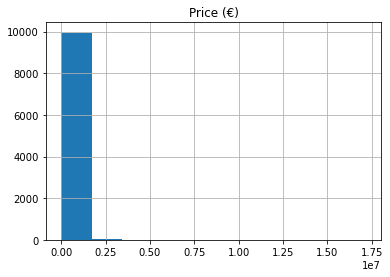

In [44]:
df[numeric_columns].hist()

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

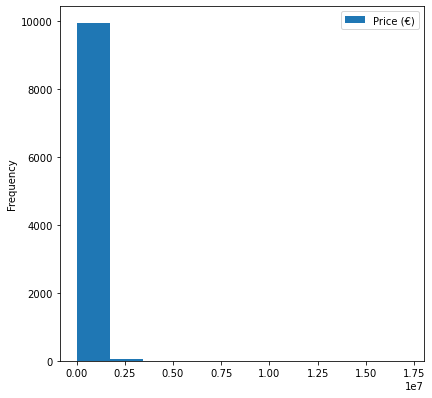

In [45]:
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,30), layout=(4,4), sharex=False, sharey=False)


### It is clear from the looking at these histograms of price that there is a large range of values, that is heavily right skewed

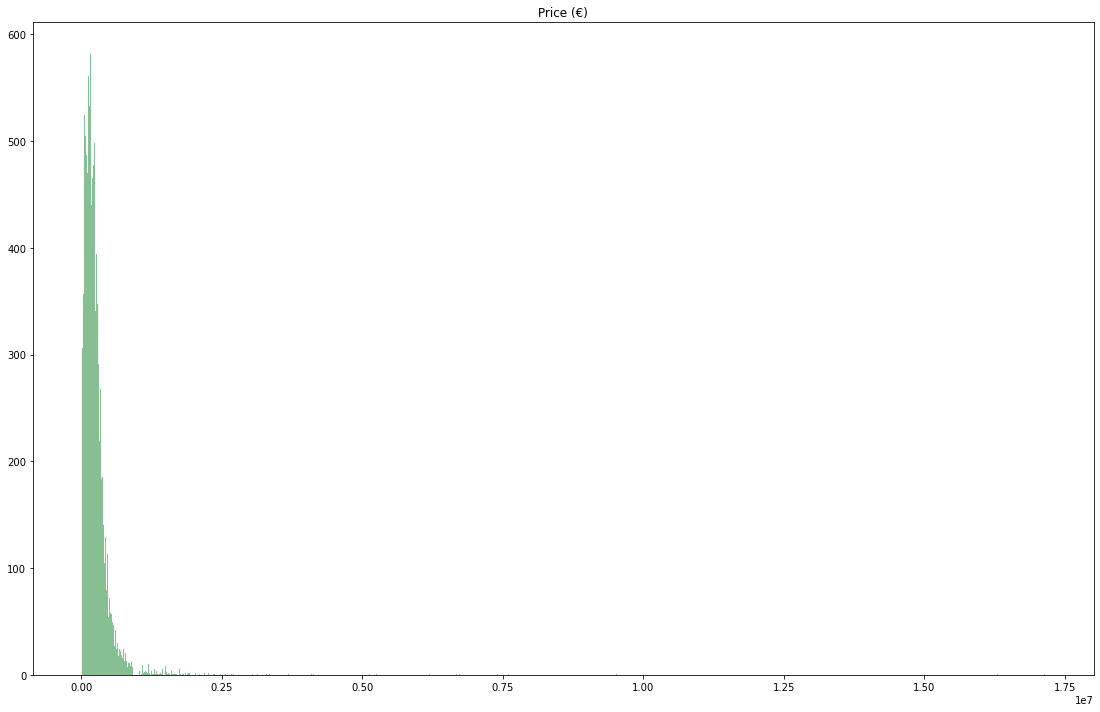

In [46]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)
plt.savefig('Homework1-DataQualityReport-NumericFeatures-histograms_all_1-1.pdf')


(array([1.65242135e-06, 7.52373125e-08, 1.24229051e-08, 5.07414433e-09,
        1.04982296e-09, 8.74852471e-10, 1.74970494e-10, 3.49940988e-10,
        3.49940988e-10, 1.74970494e-10, 3.49940988e-10, 3.49940988e-10,
        1.74970494e-10, 1.74970494e-10, 0.00000000e+00, 0.00000000e+00,
        1.74970494e-10, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.74970494e-10, 1.74970494e-10]),
 array([5.50000000e+03, 5.77024933e+05, 1.14854987e+06, 1.72007480e+06,
        2.29159973e+06, 2.86312467e+06, 3.43464960e+06, 4.00617453e+06,
        4.57769947e+06, 5.14922440e+06, 5.72074933e+06, 6.29227427e+06,
        6.86379920e+06, 7.43532413e+06, 8.00684907e+06, 8.57837400e+06,
        9.14989893e+06, 9.72142387e+06, 1.02929488e+07, 1.08644737e+07,
        1.14359987e+07, 1.20075236e+07, 1.25790485e+07, 1.31505735e+07,
        1.37220984e+07

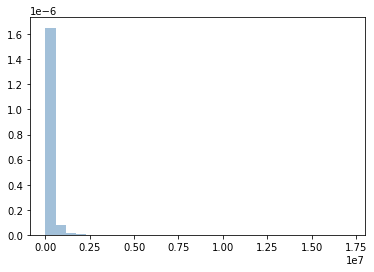

In [47]:
plt.hist(df['Price (€)'], bins=30, density=True, stacked= True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
# ax = df.hist(column='Price (€)', bins='auto', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# ax

Box Plot of Price

From the box plot you can see there is a significant number of outliers

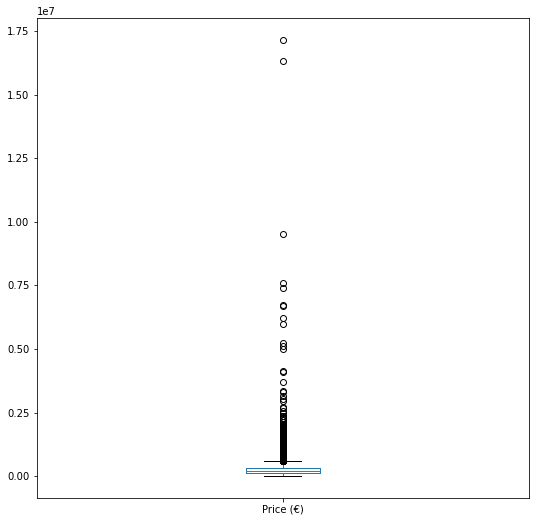

In [48]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('HomeWork-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

### Date of Sale feature 

<AxesSubplot:>

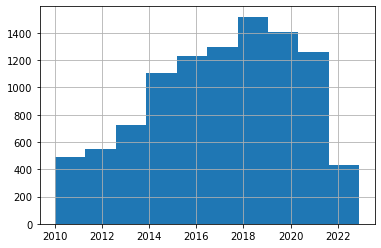

In [49]:
df['Date of Sale (dd/mm/yyyy)'].hist()

<AxesSubplot:>

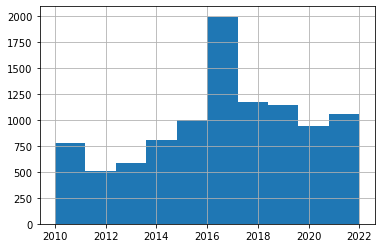

In [50]:
df['Year'].hist()

<AxesSubplot:>

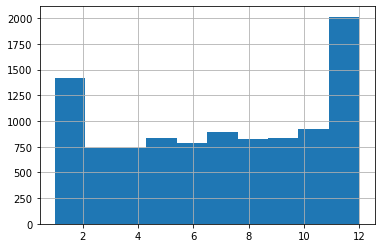

In [51]:
df['Month'].hist()

### Bar Charts for All Catergotical Features

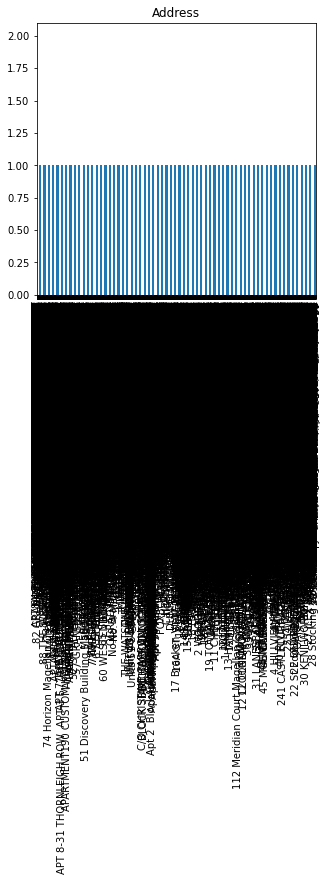

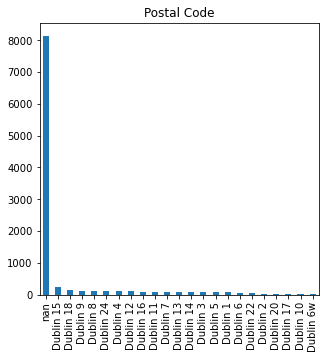

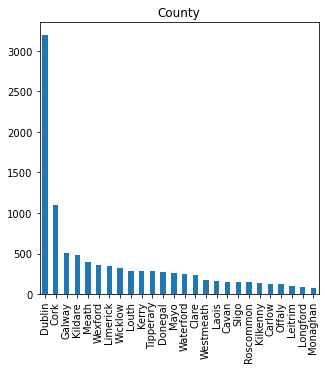

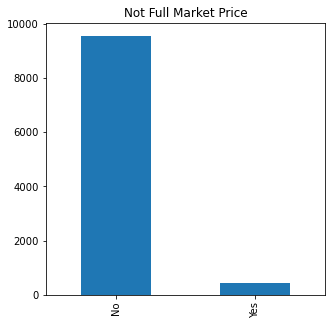

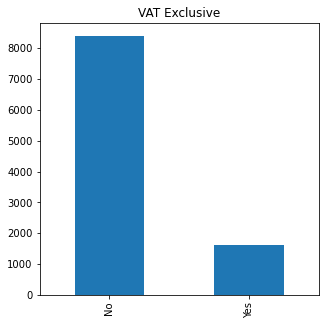

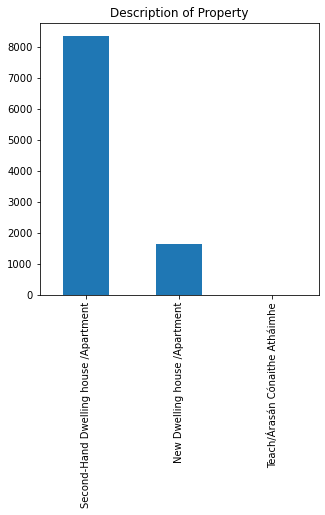

In [52]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('Homework1-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf')

# We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# categorical features.
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Part 2: data quality plan for the cleaned CSV file

### List of data quality issues and proposed solutions

Date of Sale (dd/mm/yyyy): This data was converted to datetime. I will extract the months and the years in order to compare them to other features. 

Postal Code:Large proportion missing. Opted to keep as could provide further geographical information about Dublin

Price: Large variance in data makes it difficult for interpretation. There is potential to remove outliers

Description of Property: Irish descriptions were tranlated so there were only two unique values for consistency.

Property Size Description: This feature was dropped as data was vague and the majority of the data was missing. 


| Variable Name | Data Quality Issue | Handling Stratergy |
| --- | --- | --- |
| Price (€) | Outliers | Do nothing |
| Postal Code | Outliers | Do nothing |
| Description of Property | Outliers | Do nothing |
| Propert Size Description | Outliers | Do nothing |

#### Applying solutions to new csv file with the issues addressed:

In [56]:
df.to_csv('cleanedCSV_after_data_quality_plan-ppr-17350796.csv', index=False)

## Part 3: Exploring the relationships between feature pairs:

<AxesSubplot:xlabel='Price (€)', ylabel='Month'>

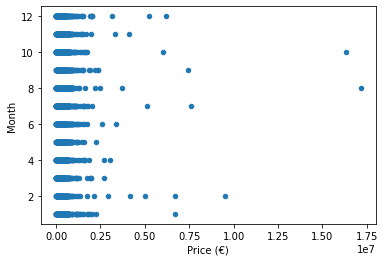

In [54]:
df.plot.scatter(x = 'Price (€)', y = 'Month')